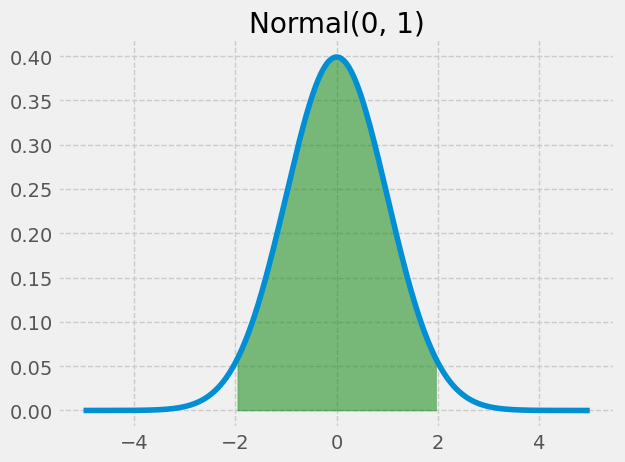

In [22]:
#Normal Distribution
import numpy as np
from scipy.stats import norm  #從scipy.stats模組中導入了 norm，它是正態分佈的概率密度函數
#或用import scipy.status as stats(後面叫出來的要跟著改)

import matplotlib.pyplot as plt  #在程式碼中使用它來生成圖形

# print(norm.__doc__) # see basic information
mu, sigma = 0, 1    #均值（mu）和標準差（sigma）的初始值
xlim = [mu - 5 * sigma, mu + 5 * sigma]
x = np.linspace(xlim[0], xlim[1], 1000)  
#xlim[0] 表xlim 列表中的第一個元素，而 xlim[1]第二個元素，分別代表了 x 軸的範圍的下限和上限
y = norm.pdf(x, mu, sigma)   #在給定x值下，正態分佈的概率密度函數（PDF）值
#y = norm.pdf(x=x, loc=mu, scale=sigma)
 
plt.plot(x, y)
plt.style.use('fivethirtyeight') # 538 style(某個圖形風格)
#plt.style.use('ggplot') # 某個圖形風格                       #選一個用
 
# patch the area of confidence interval
conf = 0.95  #定義了信心水準，設定為95%
ci = norm.ppf([(1-conf)/2, (1+conf)/2]) # inverse CDF　function
#使用正態分佈的百分點函數（PPF）計算了信心區間的邊界
x_ci = np.linspace(ci[0], ci[1], 1000)
#生成了包含1000個點的信心區間的x軸陣列
y_ci = norm.pdf(x_ci, mu, sigma)
#計算了在給定x值下，信心區間的正態分佈的概率密度函數（PDF）值

plt.fill_between(x_ci, y_ci, 0, color = 'g', alpha = 0.5)
plt.grid(True, linestyle='--', which='major')
plt.title('Normal({}, {})'.format(mu, sigma))
#為圖形添加了標題，顯示了均值和標準差的數值
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


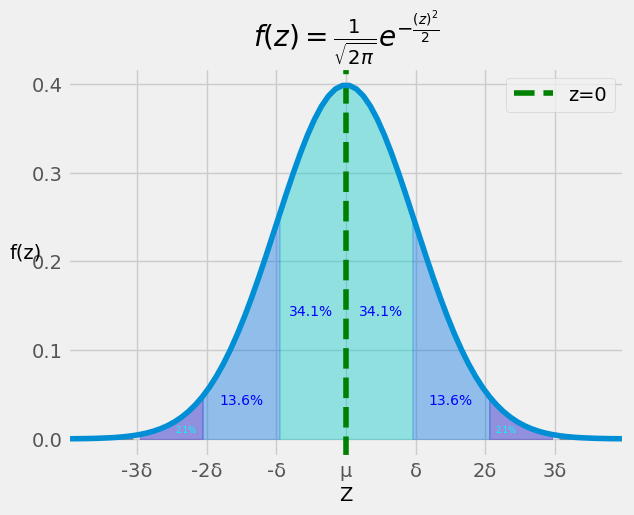

In [31]:
#標準常態
import matplotlib.pyplot as plt
import numpy as np
 
z = np.linspace(-10, 10, 200) 
y = (1/(2*np.pi)**(1/2))*np.exp(-((z)**2)/2)
plt.axvline(x=0, color='g', linestyle='--', label='z=0')

plt.yticks([0,0.1,0.2,0.3,0.4])
plt.xticks([-3, -2, -1, 0, 1, 2, 3], ['-3\u03B4', '-2\u03B4', '-\u03B4', 'μ', '\u03B4', '2\u03B4', '3\u03B4'])

plt.fill_between(z, y, where=(z >= -1) & (z <= 1), color='#00CACA', alpha=0.4)
plt.fill_between(z, y, where=(z >= 0.9) & (z <= 2.1), color='#0072E3', alpha=0.4)
plt.fill_between(z, y, where=(z >= -2.1) & (z <= -0.9), color='#0072E3', alpha=0.4)
plt.fill_between(z, y, where=(z >= -3) & (z <= -2), color='#0000C6', alpha=0.4)
plt.fill_between(z, y, where=(z >= 2) & (z <= 3), color='#0000C6', alpha=0.4)
plt.fill_between(z, y, where=(z >= 3), color='#003060', alpha=0.4)
plt.fill_between(z, y, where=(z <= -3), color='#003060', alpha=0.4)

plt.text(0.5, 0.135, '34.1%', fontsize=10, color='b', va='bottom', ha='center')
plt.text(-0.5, 0.135, '34.1%', fontsize=10, color='b', va='bottom', ha='center')
plt.text(1.5, 0.035, '13.6%', fontsize=10, color='b', va='bottom', ha='center')
plt.text(-1.5, 0.035, '13.6%', fontsize=10, color='b', va='bottom', ha='center')
plt.text(2.3, 0.005, '2.1%', fontsize=6, color='#00FFFF', va='bottom', ha='center')
plt.text(-2.3, 0.005, '2.1%', fontsize=6, color='#00FFFF', va='bottom', ha='center')

plt.plot(z, y)
plt.grid(True)
plt.xlim(0,8)
plt.xlim(-4,4)
plt.xlabel('Z')
plt.ylabel('f(z)', rotation=0)
plt.title(r'$f(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(z)^2}{2}}$')
plt.legend()
plt.savefig('poly_16.eps', format='eps')
plt.show() 

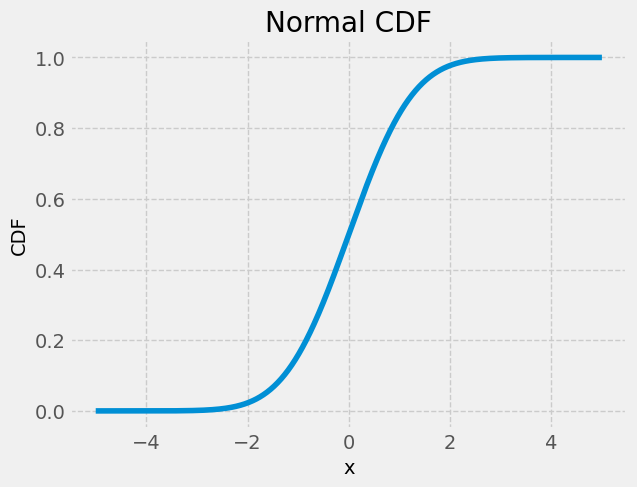

In [23]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 设定均值和标准差
mu, sigma = 0, 1

# 生成 x 值的范围
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)

# 计算正态分布的累积分布函数值
y = norm.cdf(x, mu, sigma)

# 绘制CDF图
plt.plot(x, y)
plt.title('Normal CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.grid(True, linestyle='--', which='major')
plt.show()


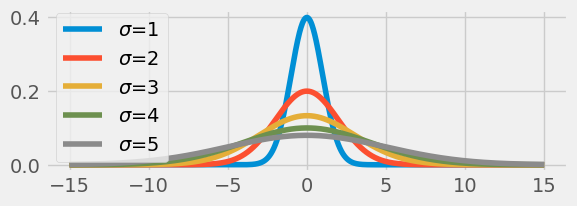

In [260]:
# Broadcasting 示範  #不是用迴歸
fig, ax = plt.subplots(figsize = [6, 2])
xlim = [-15, 15]
mu = 0   #正態分佈的均值（$\mu$）為0
s = np.arange(1, 6)  #創建了一個陣列 s，其中包含了從1到5的整數
x = np.linspace(xlim[0], xlim[1], 1000)
Y = norm.pdf(x.reshape(-1, 1), mu, s)  #計算每個標準差值下的正態分佈的概率密度函數值，並使用reshape(-1, 1)來匹配維度

#上面兩行可用下面兩行替代
#x = np.linspace(xlim[0], xlim[1], 1000).reshape(-1, 1)
#Y = norm.pdf(x, mu, s)

# print(y.shape)
label = ["$\sigma$={}".format(i) for i in s]   # 生成一個包含每個標準差值的標籤列表 # list comprehension (loop in bracket)
plt.plot(x, Y, label=label)
plt.legend()
plt.show()

c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


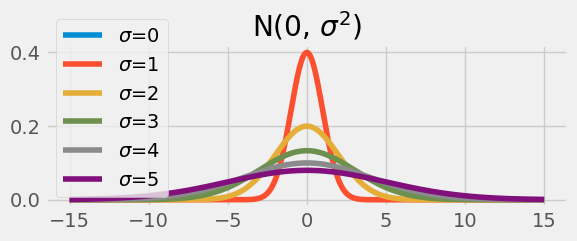

In [254]:
fig, ax = plt.subplots(figsize = [6, 2])
xlim = [-15, 15]
mu = 0
s = np.arange(0, 6, 1)
x = np.linspace(mu - 3*s.max(), mu + 3*s.max(), 1000)
plt.style.use('fivethirtyeight')

#迴圈
for i in s :
    y = norm.pdf(x, mu, i)
    plt.plot(x, y, label='$\sigma$={}'.format(i))

plt.title('N(0, $\sigma^2$)')
plt.legend()
plt.show()

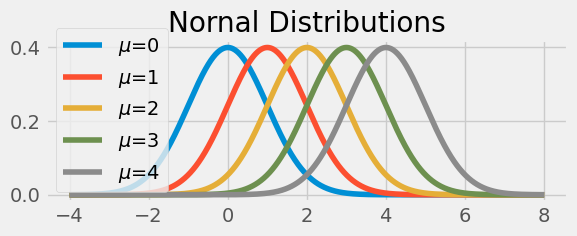

In [253]:
fig, ax = plt.subplots(figsize = [6,2])
xlim = [-4, 8]
s = 1   
mu = np.arange(0, 5, 1)
x = np.linspace(xlim[0], xlim[1], 1000)
Y = norm.pdf(x.reshape(-1, 1), mu, s)  

label = ["$\mu$={}".format(i) for i in mu]   # 生成一個包含每個標準差值的標籤列表 # list comprehension (loop in bracket)
plt.plot(x, Y, label=label)
plt.title('Nornal Distributions')
plt.legend()
plt.show()

c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


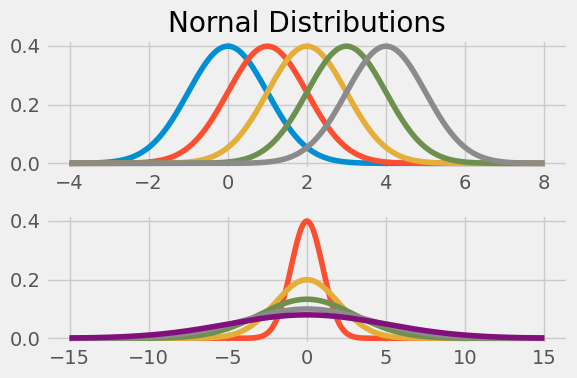

In [288]:
#\beta distribution 四張子圖
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 創建 2x2 的子圖網格
fig, axs = plt.subplots(2, 1, figsize = [6, 4])

#第一張
xlim1 = [-4, 8]
s1 = 1   
mu1 = np.arange(0, 5, 1)
x1 = np.linspace(xlim1[0], xlim1[1], 1000)
Y1 = norm.pdf(x.reshape(-1, 1), mu1, s1)  
label = ["$\mu$={}".format(i) for i in mu] 
axs[0].plot(x1, Y1, label=label)

#第二張
xlim2 = [-15, 15]
mu2 = 0
s2 = np.arange(0, 6, 1)
x2 = np.linspace(-15, 15, 1000)
plt.style.use('fivethirtyeight')
#迴圈
for i in s2 :
    y2 = norm.pdf(x2, mu2, i)
    axs[1].plot(x2, y2)

axs[0].set_title('Nornal Distributions')

plt.tight_layout()
plt.savefig('poly_36.eps', format='eps')
plt.show()


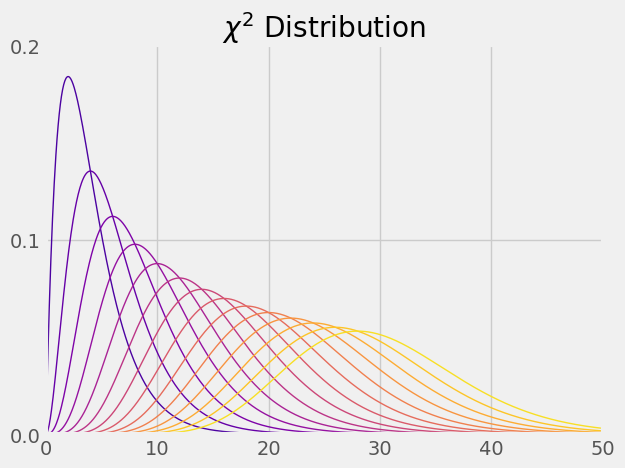

In [289]:
import numpy as np
from scipy.stats import chi2  #從SciPy庫的stats模組中引入卡方分佈的相關函數
import matplotlib.pyplot as plt
 
xlim = [0, 50]
x = np.linspace(xlim[0], xlim[1], 1000)
 
# df 
df = np.arange(4, 32, 2) #生成自由度的序列，從4開始，到32（不包括32），步長為2
# fix xlim before animation
plt.figure()
plt.axis([xlim[0], xlim[1], 0, 0.2])

for i in df:   #遍歷df中的每個自由度
    y=chi2.pdf(x, i)   #計算對應於當前自由度i的卡方分佈的概率密度函數值
    #plt.plot(x,y, lw=1, color='blue')  #顏色用漸層 list comprehension做做看用color
    plt.plot(x,y, lw=1, color=plt.cm.plasma(i/32))  #繪製卡方分佈的概率密度函數曲線，並設定線寬為1
    #在color maps找 plasma   #顏色使用plt.cm.plasma(i/32)來獲取一個漸變的顏色
    # plt.pause(0.5)
 
plt.title(r'$\chi^2$ Distribution')
plt.yticks([0, 0.1, 0.2])
plt.savefig('poly_37.eps', format='eps')
plt.show()

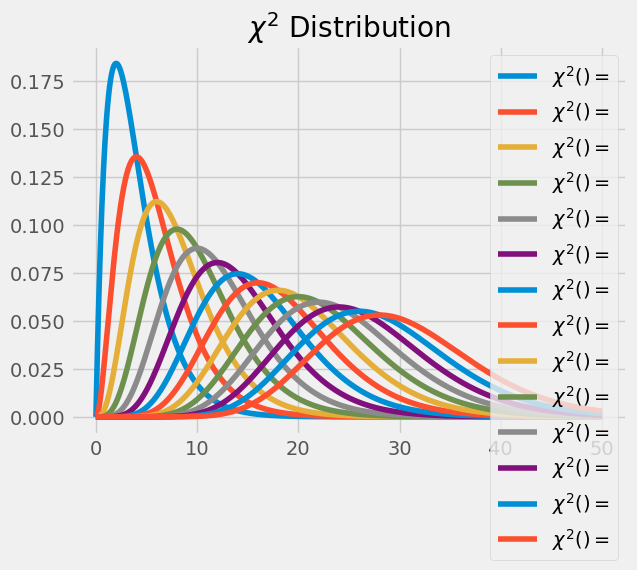

In [18]:
## Broadcasting  #不用迴圈
fig, ax = plt.subplots()
xlim = [0, 50]
x = np.linspace(xlim[0], xlim[1], 1000)
df = np.arange(4, 32, 2)
y = chi2.pdf(x.reshape(-1, 1), df)

plt.style.use('fivethirtyeight')

label = ["$\chi^2()=$".format(i) for i in df]
plt.plot(x, y, label=label)

plt.title(r'$\chi^2$ Distribution')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


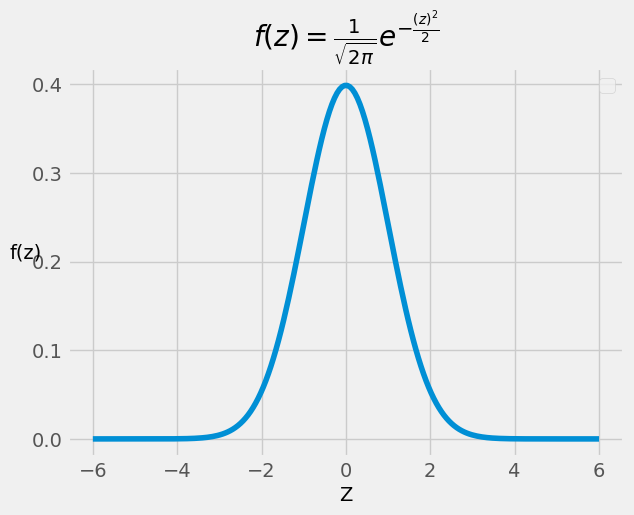

In [34]:
#標準常態 用來跟T做比較
import matplotlib.pyplot as plt
import numpy as np
 
z = np.linspace(-6, 6, 200) 
y = (1/(2*np.pi)**(1/2))*np.exp(-((z)**2)/2)

plt.yticks([0,0.1,0.2,0.3,0.4])
           
plt.plot(z, y)
plt.grid(True)
plt.xlabel('Z')
plt.ylabel('f(z)', rotation=0)
plt.title(r'$f(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(z)^2}{2}}$')
plt.legend()
#plt.savefig('poly_16.eps', format='eps')
plt.show() 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


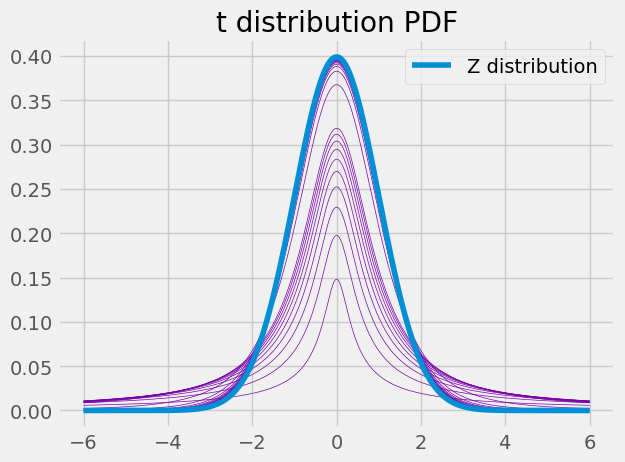

In [229]:
# T Distribution 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# 自由度的範圍從 0.1 到 1，以0.1為間隔
df_values = ([np.arange(0.1, 1.1, 0.1), np.arange(3, 31, 3)])
z = np.linspace(-6, 6, 200) 
y = (1/(2*np.pi)**(1/2))*np.exp(-((z)**2)/2)

# 生成一個 x 值的範圍
x = np.linspace(-6, 6, 1000)
    
# 繪製 t 分配的 PDF
for nu in df_values[0]:
    pdf = t.pdf(x, df=nu)
    plt.plot(x, pdf, linewidth = 0.5, color=plt.cm.plasma(i/128))

for nu in df_values[1]:
    pdf = t.pdf(x, df=nu)
    plt.plot(x, pdf, linewidth = 0.5, color=plt.cm.plasma(i/128))
    #label=f'ν = {nu}' 可以寫在裡面

plt.plot(z, y, label='Z distribution')
plt.title('t distribution PDF')

plt.legend()
plt.savefig('poly_33.eps', format='eps')
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


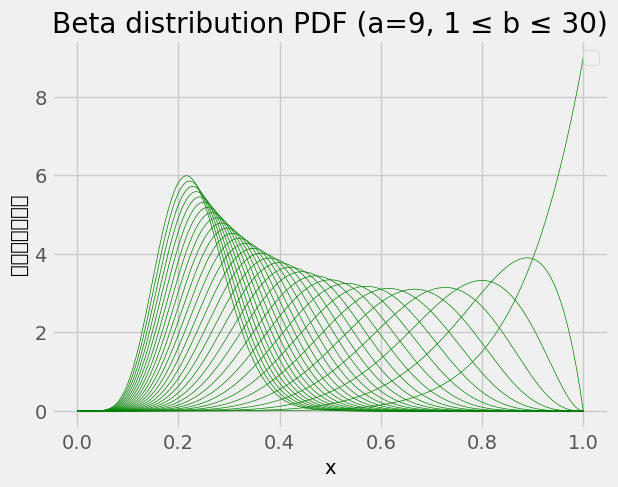

In [79]:
#\beta Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

a = 9
b_values = np.arange(1, 31)  
x = np.linspace(0, 1, 1000)

# 繪製 Beta 分佈的 PDF
for b in b_values:
    pdf = beta.pdf(x, a, b)
    plt.plot(x, pdf, linewidth = 0.5, color = 'g')

plt.title(f'Beta distribution PDF (a={a}, 1 ≤ b ≤ 30)')
plt.xlabel('x')
plt.ylabel('概率密度函數值')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


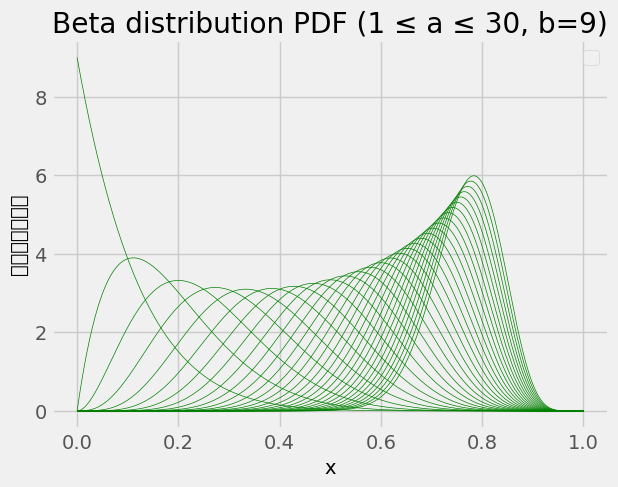

In [101]:
#\beta Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

b = 9

a_values = np.arange(1, 31)  #不含31，所以是1<=b<=30

# 生成一個 x 值的範圍
x = np.linspace(0, 1, 1000)

# 繪製 Beta 分佈的 PDF
for a in a_values:
    pdf = beta.pdf(x, a, b)
    plt.plot(x, pdf, linewidth = 0.5, color = 'g')

plt.title(f'Beta distribution PDF (1 ≤ a ≤ 30, b={b})')
plt.xlabel('x')
plt.ylabel('概率密度函數值')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20989 (\N{CJK UNIF

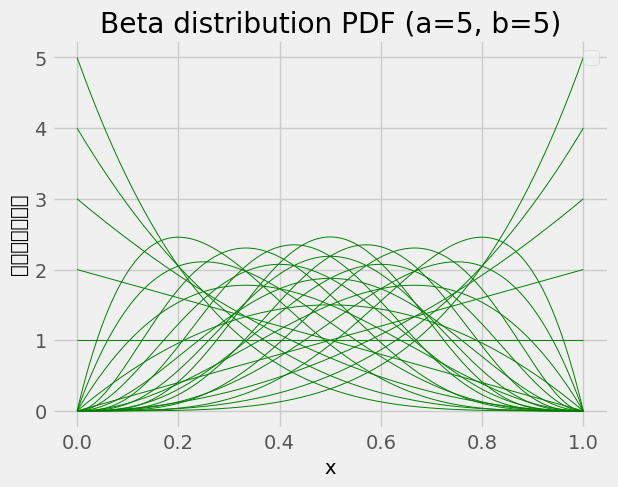

In [114]:
#\beta Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

a_values = np.arange(1, 6)  
b_values = np.arange(1, 6)  
x = np.linspace(0, 1, 1000)

# 繪製 Beta 分佈的 PDF
for b in b_values:
    for a in a_values:
        pdf = beta.pdf(x, a, b)
        plt.plot(x, pdf, linewidth = 0.7, color = 'g')

plt.title(f'Beta distribution PDF (a={a}, b={b})')
plt.xlabel('x')
plt.ylabel('概率密度函數值')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


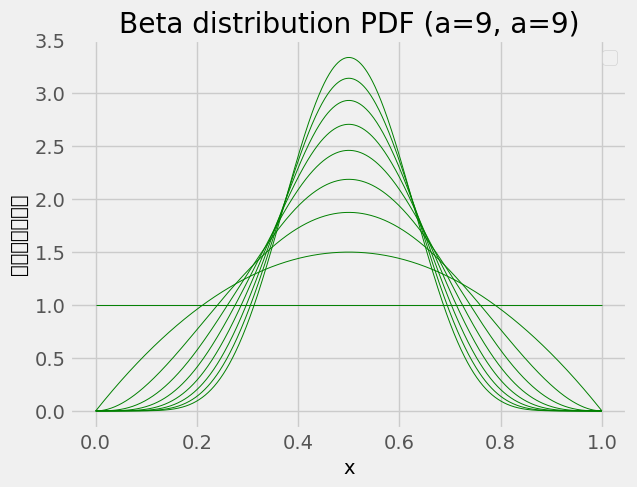

In [98]:
#\beta Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

a_values = np.arange(1, 10)   
x = np.linspace(0, 1, 1000)

# 繪製 Beta 分佈的 PDF
for a in a_values:
        pdf = beta.pdf(x, a, a)
        plt.plot(x, pdf, linewidth = 0.7, color = 'g')

plt.title(f'Beta distribution PDF (a={a}, a={a})')
plt.xlabel('x')
plt.ylabel('概率密度函數值')
plt.legend()
plt.show()


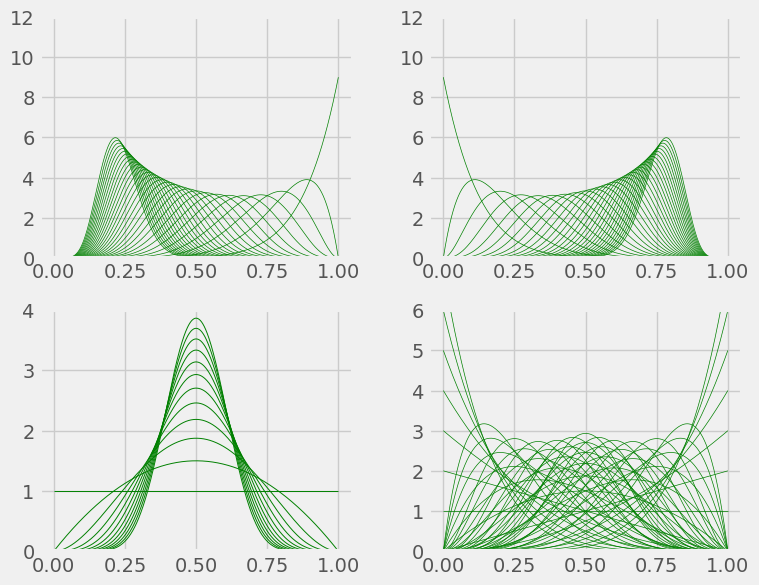

In [259]:
#\beta distribution 四張子圖
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 創建 2x2 的子圖網格
fig, axs = plt.subplots(2, 2, figsize = [8, 6])

#第一張
a1 = 9
b1_values = np.arange(1, 31)  
x1 = np.linspace(0, 1, 1000)
axs[0][0].set_ylim(0, 12)
for b1 in b1_values:
    pdf1 = beta.pdf(x1, a1, b1)
    axs[0][0].plot(x1, pdf1, linewidth = 0.5, color = 'g')

#第二張
b2 = 9
a2_values = np.arange(1, 31)
x2 = np.linspace(0, 1, 1000)
axs[0][1].set_ylim(0, 12)
for a2 in a2_values:
    pdf2 = beta.pdf(x2, a2, b2)
    axs[0][1].plot(x2, pdf2, linewidth = 0.5, color = 'g')

#第三張
a3_values = np.arange(1, 13)   
x3 = np.linspace(0, 1, 1000)
axs[1][0].set_ylim(0, 4)
for a3 in a3_values:
    pdf3 = beta.pdf(x3, a3, a3)
    axs[1][0].plot(x3, pdf3, linewidth = 0.7, color = 'g')

#第四張
a4_values = np.arange(1, 8)  
b4_values = np.arange(1, 8)  
x4 = np.linspace(0, 1, 1000)
axs[1][1].set_ylim(0, 6)
for b4 in b4_values:
    for a4 in a4_values:
        pdf4 = beta.pdf(x4, a4, b4)
        axs[1][1].plot(x4, pdf4, linewidth = 0.5, color = 'g')

plt.tight_layout()
plt.savefig('poly_34.eps', format='eps')
plt.show()


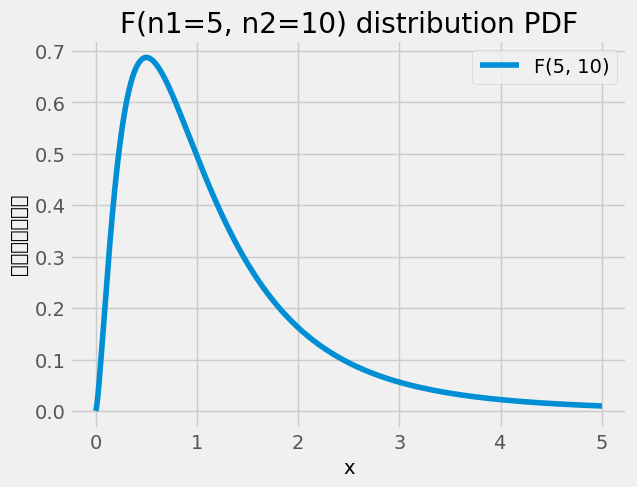

In [74]:
# F Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# 自由度設定
n1 = 5  # 第一組自由度
n2 = 10  # 第二組自由度

# 生成 x 值範圍
x = np.linspace(0, 5, 1000)

# 計算 F 分佈的概率密度函數 (PDF)
pdf = f.pdf(x, n1, n2)

# 繪製 F 分佈的 PDF
plt.plot(x, pdf, label=f'F({n1}, {n2})')

# 添加標題和標籤
plt.title(f'F(n1={n1}, n2={n2}) distribution PDF')
plt.xlabel('x')
plt.ylabel('概率密度函數值')

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


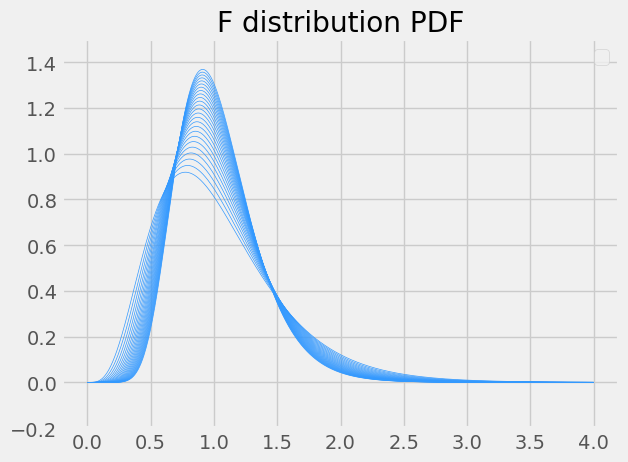

In [291]:
# F Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

n2 = 60
n1_values = np.arange(10, 35)  
x = np.linspace(0, 4, 1000)

for n1 in n1_values:
    pdf = f.pdf(x, n1, n2)
    plt.plot(x, pdf, linewidth = 0.5, color = '#3399FF')

plt.title(f'F distribution PDF')
plt.ylim(-0.2, 1.5)

plt.legend()
plt.savefig('poly_35.eps', format='eps')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


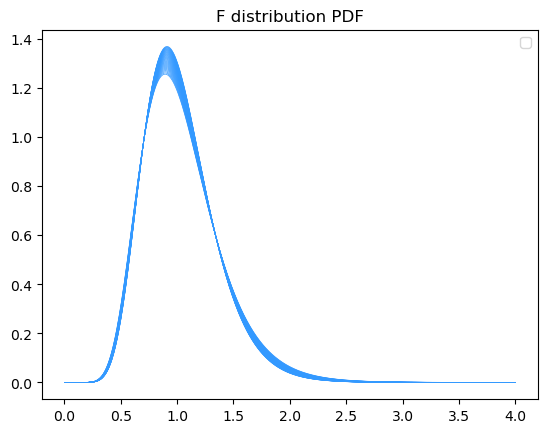

In [5]:
# F Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

n1 = 30
n2_values = np.arange(45, 80)  
x = np.linspace(0, 4, 1000)

for n2 in n2_values:
    pdf = f.pdf(x, n1, n2)
    plt.plot(x, pdf, linewidth = 0.5, color = '#3399FF')

plt.title(f'F distribution PDF')
#plt.ylim(-0.2, 1.5)

plt.legend()
#plt.savefig('poly_35.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


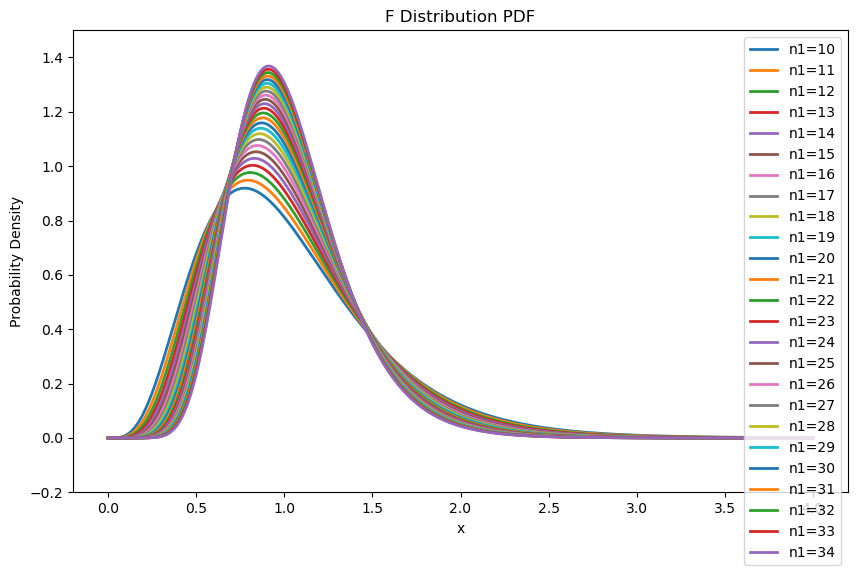

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

n2 = 60
n1_values = np.arange(10, 35)  
x = np.linspace(0, 4, 1000)

plt.figure(figsize=(10, 6))  # 調整圖形大小

for n1 in n1_values:
    pdf = f.pdf(x, n1, n2)
    plt.plot(x, pdf, label=f'n1={n1}', linewidth=2)

plt.title('F Distribution PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(-0.2, 1.5)
plt.legend()
plt.savefig('F_distribution_plot.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


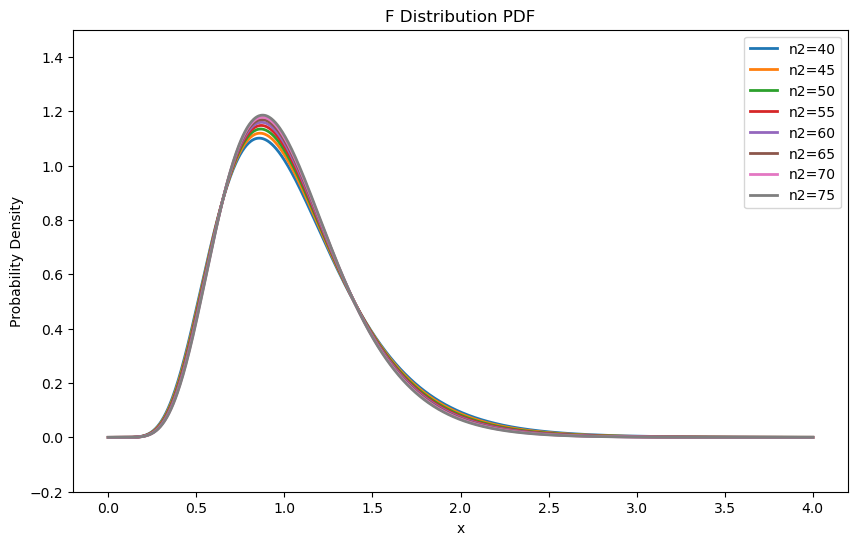

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

n1 = 20
n2_values = np.arange(40, 80, 5)  
x = np.linspace(0, 4, 1000)

plt.figure(figsize=(10, 6))

for n2 in n2_values:
    pdf = f.pdf(x, n1, n2)
    plt.plot(x, pdf, label=f'n2={n2}', linewidth=2)

plt.title('F Distribution PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(-0.2, 1.5)
plt.legend()
plt.savefig('F_distribution_n2_plot.eps', format='eps')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


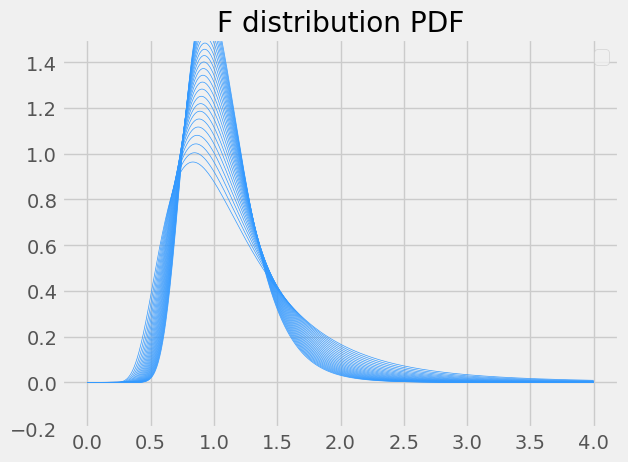

In [297]:
# F Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

n1 = 100000000
n2_values = np.arange(10, 35)  
x = np.linspace(0, 4, 1000)

for n2 in n2_values:
    pdf = f.pdf(x, n1, n2)
    plt.plot(x, pdf, linewidth = 0.5, color = '#3399FF')

plt.title(f'F distribution PDF')
plt.ylim(-0.2, 1.5)

plt.legend()
plt.savefig('poly_35.eps', format='eps')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.

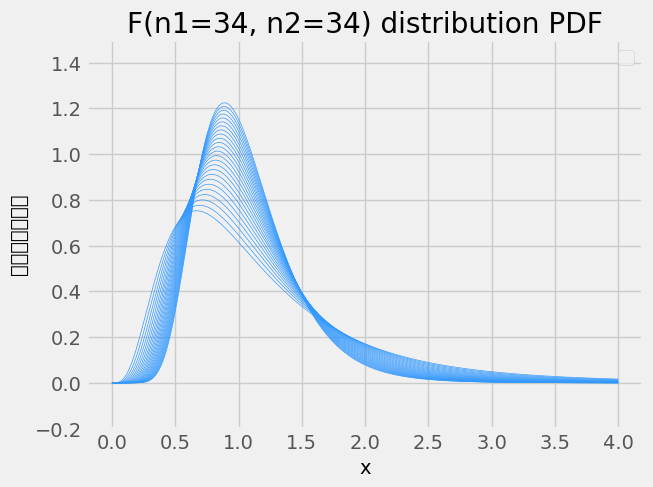

In [159]:
# F Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

n1_values = np.arange(10, 35)  
x = np.linspace(0, 4, 1000)

for n1 in n1_values:
    pdf = f.pdf(x, n1, n1)
    plt.plot(x, pdf, linewidth = 0.5, color = '#3399FF')

plt.title(f'F(n1={n1}, n2={n1}) distribution PDF')
plt.ylim(-0.2, 1.5)
plt.xlabel('x')
plt.ylabel('概率密度函數值')
plt.legend()
plt.show()


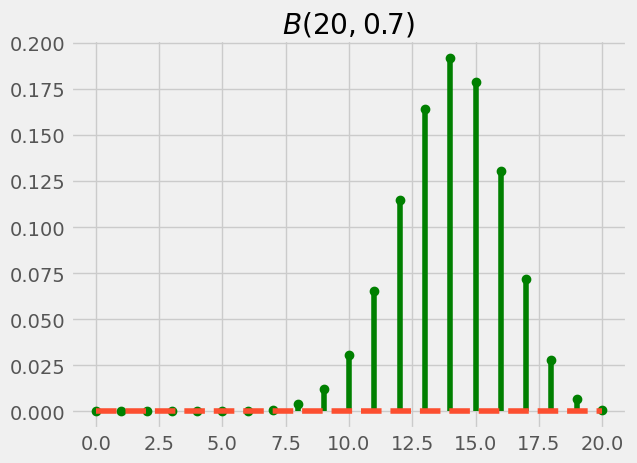

In [76]:
#類別型 不連續
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
 
n, p = 20, 0.7  #n 為 20（試驗次數），p 為 0.7（成功的概率）
x = np.arange(n + 1)  #包含了 0 到 n 的一個整數陣列作為二項分佈的隨機變量 x 的可能取值
y = binom.pmf(x, n, p)
plt.stem(x, y, linefmt='g-', markerfmt='o', basefmt = 'C1--')  #linefmt 參數設置了線的格式，markerfmt 參數設置了標記的格式，basefmt 參數設置了基線的格式
#plt.plot(x, y, drawstyle = 'steps-pre')  #用來繪製離散變量的折線圖
#drawstyle='steps-pre' 指定了繪製折線圖時的連接方式
#steps-pre 表示折線將在每個 x 的值處以一個水平線段開始，然後在下一個 x 的值處以垂直線段繼續
plt.title('$B(20, 0.7)$')
plt.show()

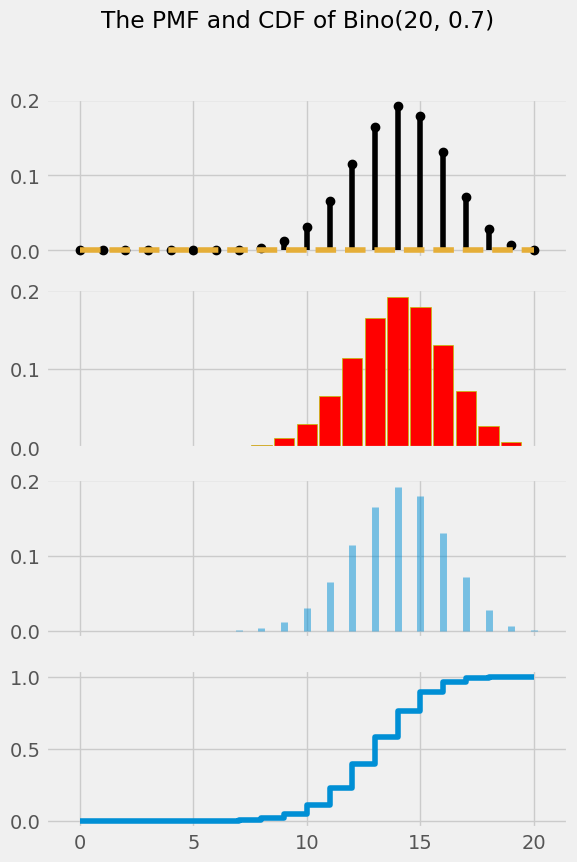

In [77]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
 
n, p = 20, 0.7
x = np.arange(n + 1)   #一個包含了 0 到 n 的整數陣列，這將作為二項分佈的隨機變量 x 的可能取值
y = binom.pmf(x, n, p)
fig, ax = plt.subplots(4,1, sharex = 'col', figsize = [6, 9]) #創建一個4行1列的子圖布局 #sharex='col': 表示子圖將共享x軸
ax[0].stem(x, y, linefmt='k-', markerfmt='ko', basefmt = 'C2--') #ax[0]：表示第一個子圖 
#linefmt='k-'：線的格式設置為黑色實線 (k-)
#markerfmt='ko'：標記點的格式設置為黑色圓點 (ko)
#basefmt='C2--'：基線的格式設置為綠色虛線 (C2--)
ax[1].bar(x, y, width = 0.9, color = 'r', edgecolor = 'y' )
#使用 bar 函數繪製了二項分佈的 PMF 圖表
ax[2].vlines(x, 0, y, lw = 5, alpha = 0.5)
#用 vlines 函數繪製了垂直線，將每個 x 的值連接到對應的概率值
Y = binom.cdf(x, n, p)
ax[3].plot(x, Y, drawstyle = 'steps-pre')
plt.suptitle('The PMF and CDF of Bino({}, {})'.format(n, p))
plt.show()

#x軸只有在最後一張有出現 共用x軸

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


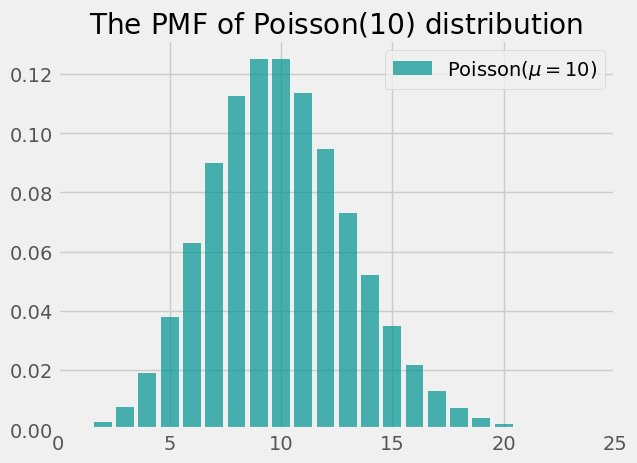

In [462]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 設定參數 mu
mu = 10

# 生成一個 x 值的範圍
x = np.arange(0, 25)

# 計算 Poisson 分佈的 PMF
pmf = poisson.pmf(x, mu)

# 繪製 PMF
plt.bar(x, pmf, color='#009393', alpha=0.7, label=f'Poisson($\mu={mu}$)')

plt.title(f'The PMF of Poisson$({mu})$ distribution')
plt.legend()
plt.xlim(0,25)
plt.savefig('poly_32.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


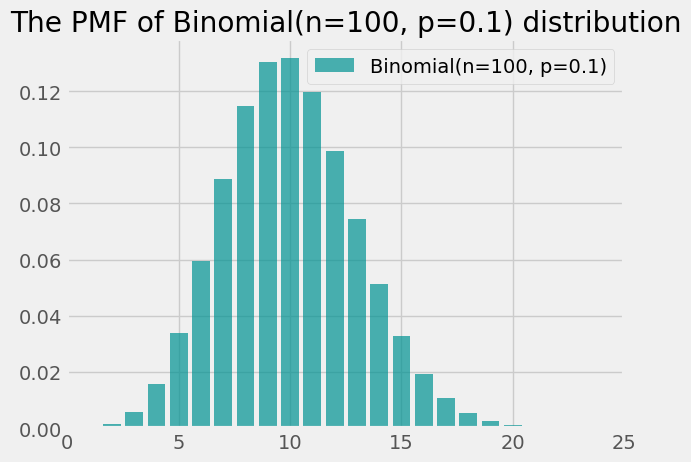

In [464]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 定義參數
n = 100
p = 0.1

# 生成 x 值的範圍
x = np.arange(0, n+1)

# 計算二項分佈的 PMF
pmf = binom.pmf(x, n, p)

# 繪製 PMF
plt.bar(x, pmf, color='#009393', alpha=0.7, label=f'Binomial(n={n}, p={p})')

plt.title(f'The PMF of Binomial(n={n}, p={p}) distribution')
plt.legend()
plt.xlim(0,25)
plt.savefig('poly_51.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


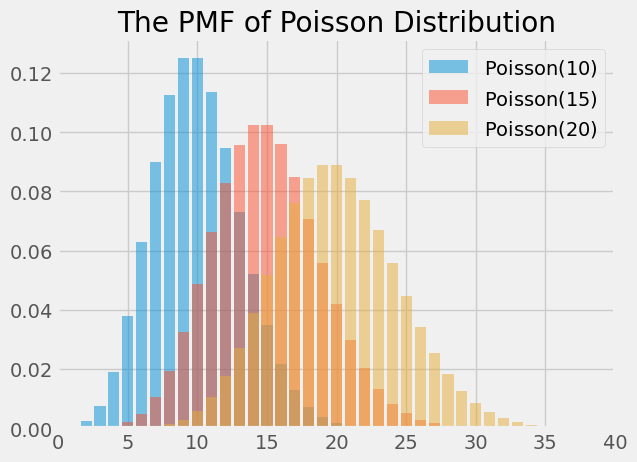

In [460]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 定義 mu 的列表
mu_values = [10, 15, 20]

# 生成一個 x 值的範圍
x = np.arange(0, 50)

for mu in mu_values:
    # 計算 Poisson 分佈的 PMF
    pmf = poisson.pmf(x, mu)

    # 繪製 PMF
    plt.bar(x, pmf, alpha=0.5, label=f'Poisson(${mu}$)')

plt.title(f'The PMF of Poisson Distribution')
plt.legend()
#plt.xlabel('Number of Events')
#plt.ylabel('Probability')
plt.xlim(0, 40)
plt.savefig('poly_50.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


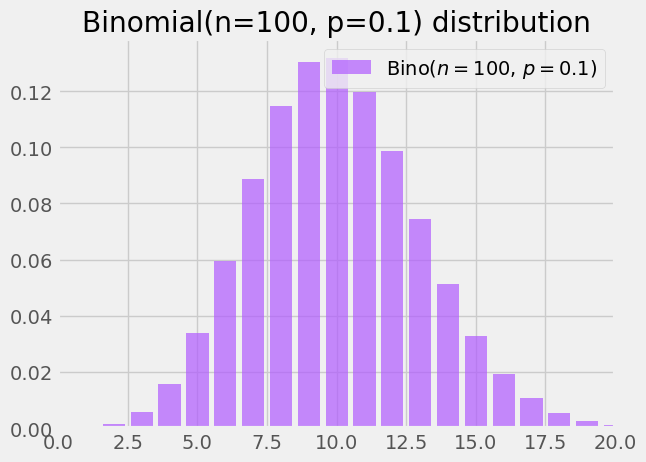

In [570]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 設定參數 n 和 p
n = 100
p = 0.1

# 生成一個 x 值的範圍
x = np.arange(0, n+1)

# 計算二項分佈的 PMF
pmf = binom.pmf(x, n, p)

# 繪製 PMF
plt.bar(x, pmf, color='#B15BFF', alpha=0.7, label=f'Bino($n={n}$, $p={p}$)')

plt.title(f'Binomial(n={n}, p={p}) distribution')
plt.xlim(0, 20)
plt.legend()
plt.savefig('poly_26.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


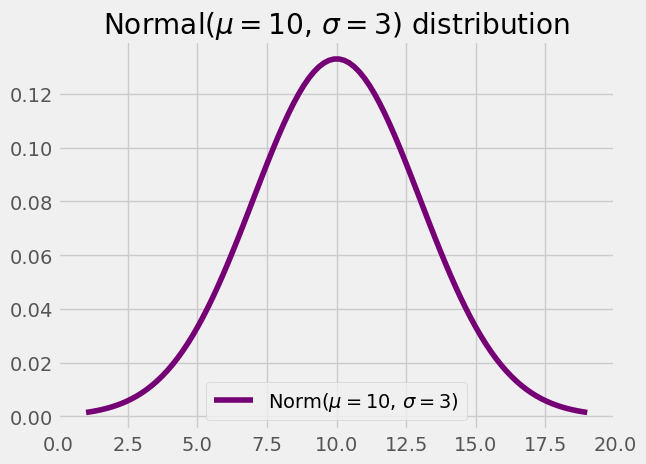

In [569]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 設定參數 mu 和 sigma
mu = 10
sigma = 3

# 生成一個 x 值的範圍
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# 計算正態分佈的概率密度函數 (PDF)
pdf = norm.pdf(x, mu, sigma)

# 繪製 PDF
plt.plot(x, pdf, color='#750075', label=f'Norm($\mu={mu}$, $\sigma={sigma}$)')

plt.title(f'Normal($\mu={mu}$, $\sigma={sigma})$ distribution')
plt.xlim(0, 20)
plt.legend()
plt.savefig('poly_27.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


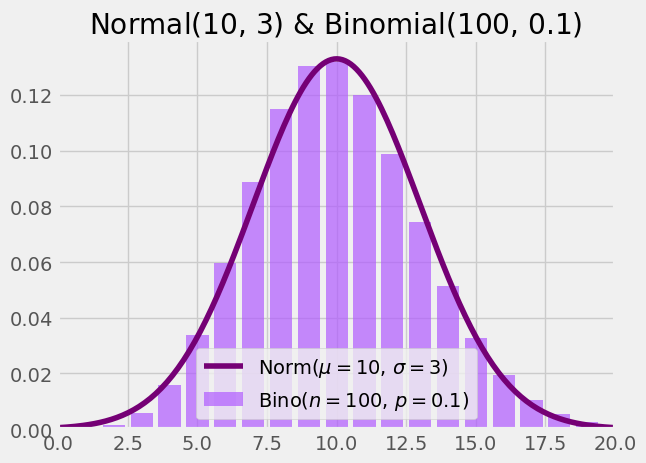

In [571]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# 設定二項分佈的參數
n = 100
p = 0.1

# 設定正態分佈的參數
mu = 10
sigma = 3

# 生成一個 x 值的範圍
x = np.arange(0, n+1)

# 計算二項分佈的 PMF
pmf = binom.pmf(x, n, p)

# 生成一個 x 值的範圍（用於正態分佈）
x_norm = np.linspace(0, n, 1000)

# 計算正態分佈的 PDF
pdf_norm = norm.pdf(x_norm, mu, sigma)

# 繪製 PMF
plt.bar(x, pmf, color='#B15BFF', alpha=0.7, label=f'Bino($n={n}$, $p={p}$)')

# 繪製正態分佈的 PDF
plt.plot(x_norm, pdf_norm, color='#750075', label=f'Norm($\mu={mu}$, $\sigma={sigma}$)')

plt.title(f'Normal(${mu}$, ${sigma})$ & Binomial({n}, {p}) ')

plt.xlim(0,20)
plt.legend()
plt.savefig('poly_28.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


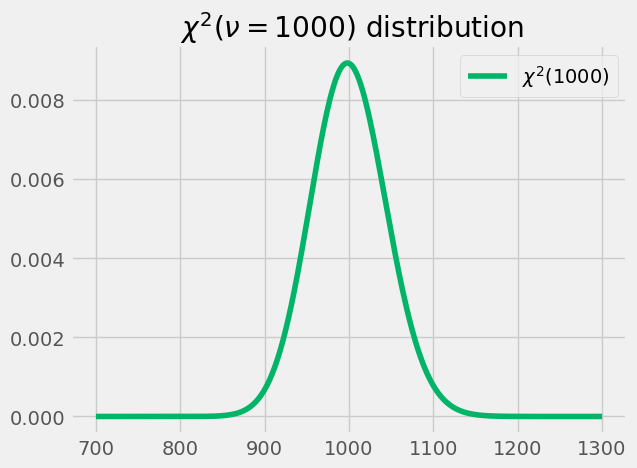

In [572]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 設定自由度
nu = 1000

# 生成一個 x 值的範圍
x = np.linspace(700, 1300, 1000)  # 設定一個合適的範圍

# 計算卡方分佈的概率密度函數 (PDF)
pdf = chi2.pdf(x, df=nu)

# 繪製卡方分佈的 PDF
plt.plot(x, pdf, color='#01B468', label=f'$\chi^2({nu})$')

plt.title(f' $\chi^2$($\\nu={nu}$) distribution')

plt.legend()
plt.savefig('poly_29.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


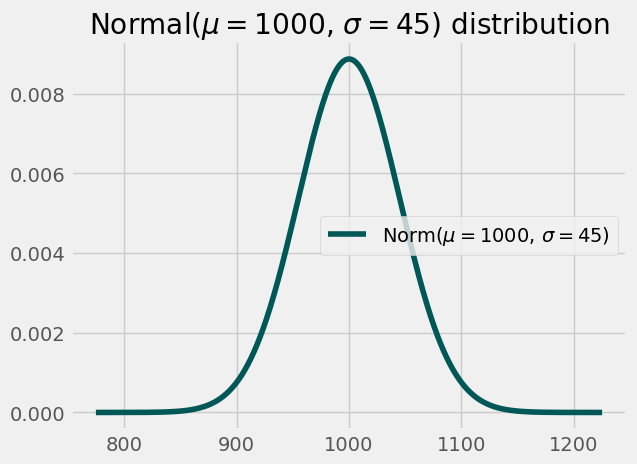

In [573]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 設定參數
mu = 1000
sigma = 45

# 生成一個 x 值的範圍
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)  # 設定一個合適的範圍

# 計算正態分佈的概率密度函數 (PDF)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# 繪製正態分佈的 PDF
plt.plot(x, pdf, color='#005757', label=f'Norm($\mu={mu}$, $\sigma={sigma}$)')

plt.title(f'Normal($\mu={mu}$, $\sigma={sigma})$ distribution')

plt.legend()
plt.savefig('poly_30.eps', format='eps')
plt.show()


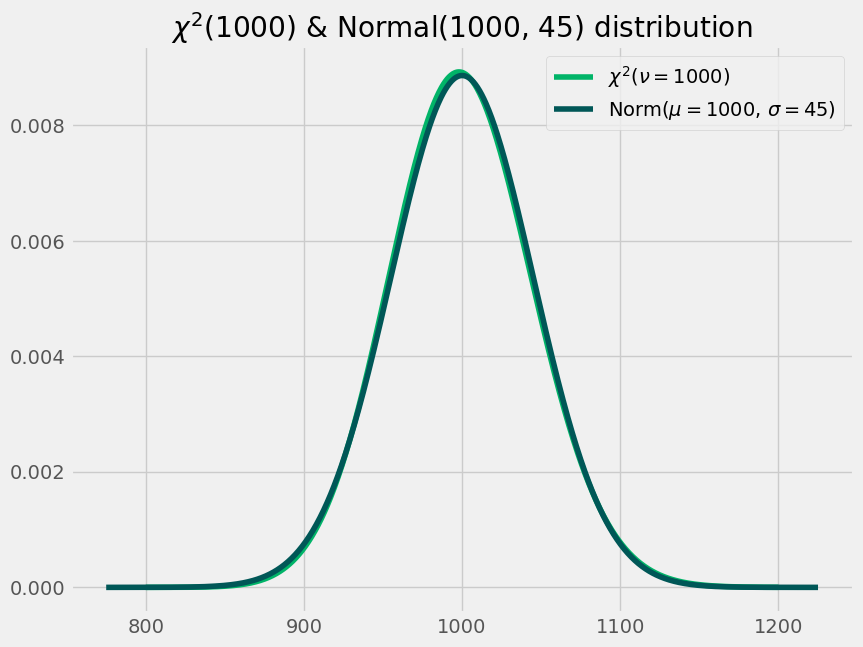

In [577]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

fig,ax=plt.subplots(figsize=(9,7))

# 設定自由度
nu = 1000

# 設定正態分佈的參數
mu = 1000
sigma = 45

# 生成一個 x 值的範圍
x_chi2 = np.linspace(800, 1200, 1000)  # 設定一個合適的範圍 for Chi-squared
x_norm = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)  # 設定一個合適的範圍 for Normal

# 計算 Chi-squared 分佈的概率密度函數 (PDF)
pdf_chi2 = chi2.pdf(x_chi2, df=nu)

# 計算正態分佈的概率密度函數 (PDF)
pdf_norm = norm.pdf(x_norm, loc=mu, scale=sigma)

# 繪製 Chi-squared 分佈的 PDF
plt.plot(x_chi2, pdf_chi2, color='#01B468', label=f'$\chi^2$($\\nu={nu}$)')

# 繪製正態分佈的 PDF
plt.plot(x_norm, pdf_norm, color='#005757', label=f'Norm($\mu={mu}$, $\sigma={sigma}$)')

plt.title(f'$\chi^2$(${nu}$) & Normal(${mu}$, ${sigma})$ distribution')

plt.legend()
plt.savefig('poly_31', dpi=300)
plt.show()


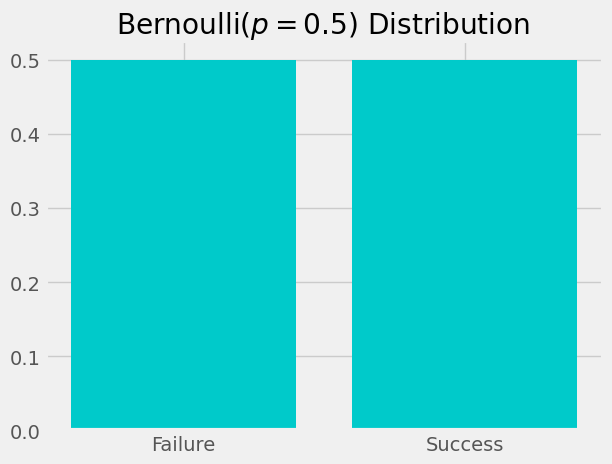

In [357]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 設定成功的機率 p
p = 0.5  # 可以根據需要調整成功的機率

# 生成隨機變數
x = np.array([0, 1])  # 只有兩種可能的結果：0（失敗）和1（成功）
pmf_values = bernoulli.pmf(x, p)

# 繪製概率質量函數 (PMF)
plt.bar(x, pmf_values,color='#00CACA')
plt.title(f'Bernoulli$(p={p})$ Distribution ')
#plt.xlabel('Outcome')
#plt.ylabel('P', rotation = 0)
plt.xticks(x, ['Failure', 'Success'])  # 標記 x 軸的值
plt.savefig('poly_41.eps', format='eps')
plt.show()


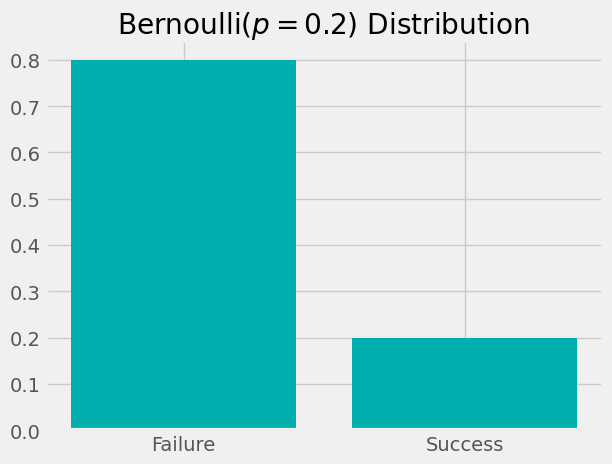

In [358]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 設定成功的機率 p
p = 0.2  # 可以根據需要調整成功的機率

# 生成隨機變數
x = np.array([0, 1])  # 只有兩種可能的結果：0（失敗）和1（成功）
pmf_values = bernoulli.pmf(x, p)

# 繪製概率質量函數 (PMF)
plt.bar(x, pmf_values, color='#00AEAE')
plt.title(f'Bernoulli$(p={p})$ Distribution ')
#plt.xlabel('Outcome')
#plt.ylabel('P', rotation = 0)
plt.xticks(x, ['Failure', 'Success'])  # 標記 x 軸的值
plt.savefig('poly_42.eps', format='eps')
plt.show()

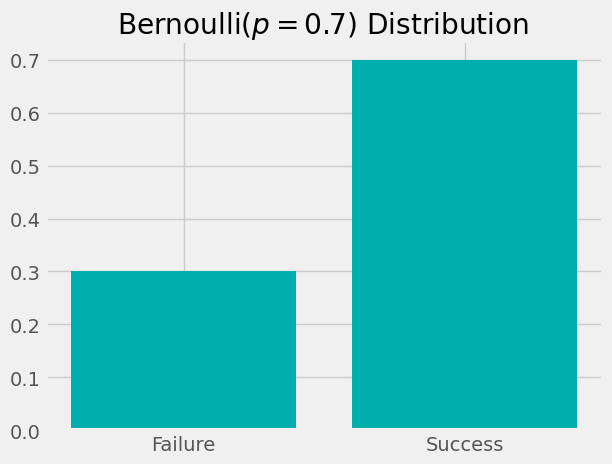

In [359]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 設定成功的機率 p
p = 0.7  # 可以根據需要調整成功的機率

# 生成隨機變數
x = np.array([0, 1])  # 只有兩種可能的結果：0（失敗）和1（成功）
pmf_values = bernoulli.pmf(x, p)

# 繪製概率質量函數 (PMF)
plt.bar(x, pmf_values, color='#00AEAE')
plt.title(f'Bernoulli$(p={p})$ Distribution ')
#plt.xlabel('Outcome')
#plt.ylabel('P', rotation = 0)
plt.xticks(x, ['Failure', 'Success'])  # 標記 x 軸的值
plt.savefig('poly_43.eps', format='eps')
plt.show()

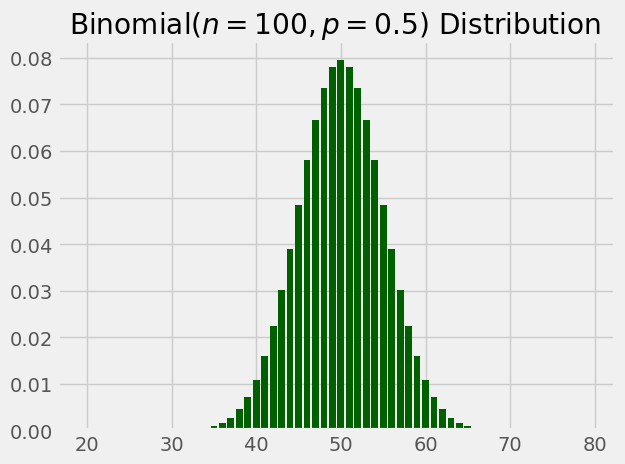

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 設定二項分配的參數
n = 100  # 試驗次數
p = 0.5  # 成功的機率

# 生成隨機變數
x = np.arange(20 , 80)
pmf_values = binom.pmf(x, n, p)

plt.bar(x, pmf_values, color='#006000')
plt.title(f'Binomial$(n={n}, p={p})$ Distribution ')
#plt.xlabel('Number of Successes')
#plt.ylabel('P', rotation = 0)
plt.savefig('poly_38.eps', format='eps')
plt.show()


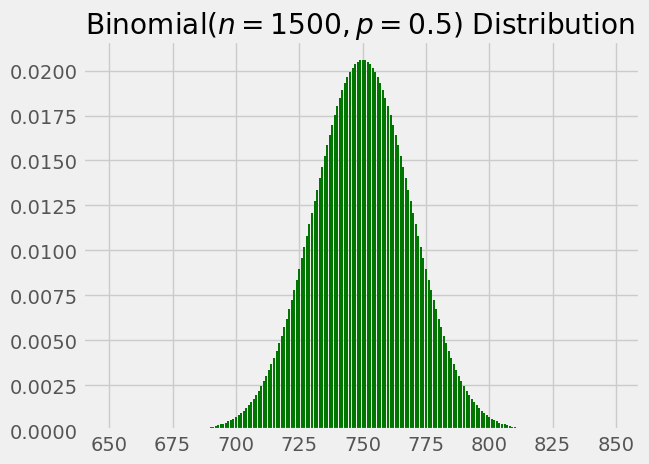

In [345]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 設定二項分配的參數
n = 1500  # 試驗次數
p = 0.5  # 成功的機率

# 生成隨機變數
x = np.arange(650, 850)
pmf_values = binom.pmf(x, n, p)

plt.bar(x, pmf_values, color='#007500')
plt.title(f'Binomial$(n={n}, p={p})$ Distribution ')
#plt.xlabel('Number of Successes')
#plt.ylabel('P', rotation = 0)
plt.savefig('poly_40.eps', format='eps')
plt.show()

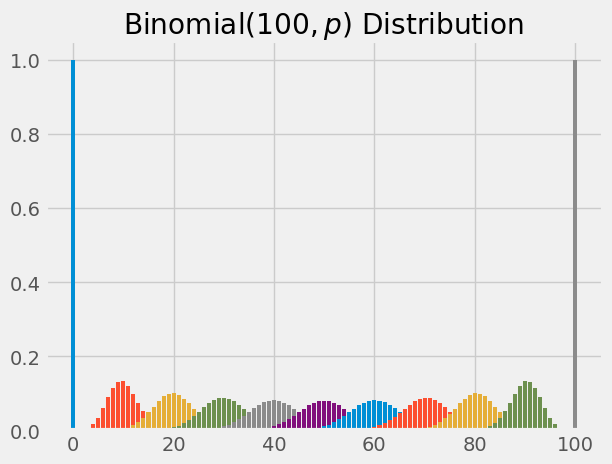

In [344]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 100
p_values = np.arange(0, 1.1, 0.1) 
x = np.arange(0, 101)

for p in p_values:
    pmf_values = binom.pmf(x, n, p)
    plt.bar(x, pmf_values)

plt.title(f'Binomial$(100, p)$ Distribution ')
#plt.xlabel('Number of Successes')
#plt.ylabel('P', rotation = 0)
plt.savefig('poly_39.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


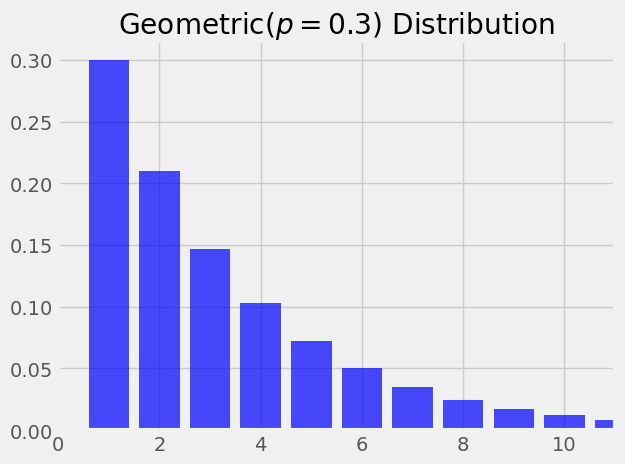

In [420]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# 設定成功的機率 p
p = 0.3  # 可以根據需要調整成功的機率

# 生成隨機變數
x = np.arange(1, 12)  # 成功事件發生的次數從 1 到 10
pmf_values = geom.pmf(x, p)

# 繪製概率質量函數 (PMF)
plt.bar(x, pmf_values, color='blue', alpha=0.7)

plt.title(f'Geometric$(p={p})$ Distribution')
plt.xlim(0,11)
#plt.xlabel('Number of Trials Until First Success')
#plt.ylabel('Probability')
plt.savefig('poly_44.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


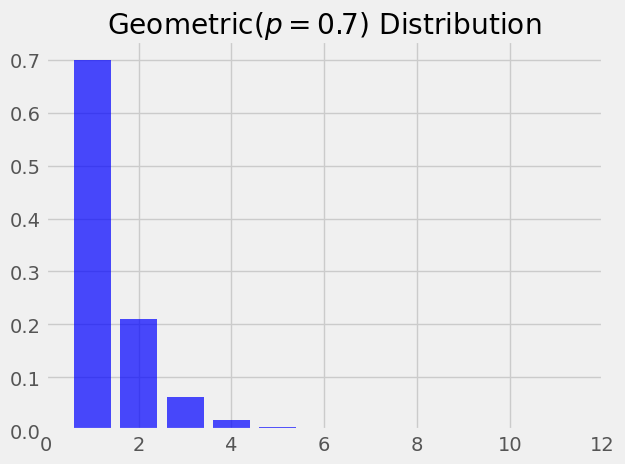

In [421]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# 設定成功的機率 p
p = 0.7  # 可以根據需要調整成功的機率

# 生成隨機變數
x = np.arange(1, 111)  # 成功事件發生的次數從 1 到 10
pmf_values = geom.pmf(x, p)

# 繪製概率質量函數 (PMF)
plt.bar(x, pmf_values, color='blue', alpha=0.7)

plt.title(f'Geometric$(p={p})$ Distribution')
plt.xlim(0,12)
#plt.xlabel('Number of Trials Until First Success')
#plt.ylabel('Probability')
plt.savefig('poly_45.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


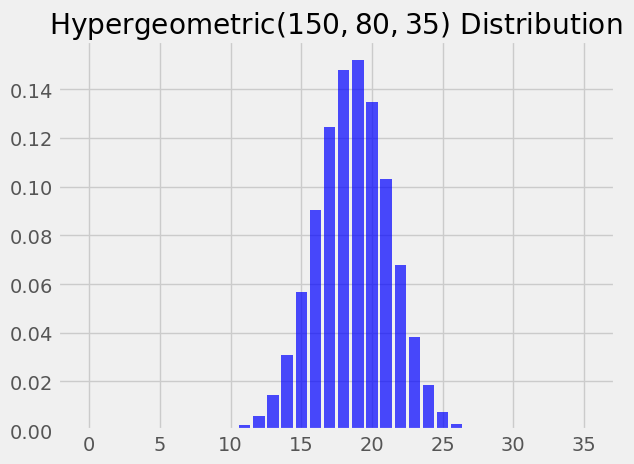

In [508]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

# 定義超幾何分佈的參數
N = 150  # 總體大小
K = 80  # 總體中成功物件的數量
n = 35   # 抽樣次數

# 生成隨機變數
x = np.arange(max(0, n-K), min(n, K)+1)
pmf_values = hypergeom.pmf(x, N, K, n)

# 繪製概率質量函數 (PMF)
plt.bar(x, pmf_values, color='blue', alpha=0.7)

plt.title(f'Hypergeometric$({N}, {K}, {n})$ Distribution ')
#plt.xlabel('Number of Successes')
#plt.ylabel('Probability')
plt.savefig('poly_52.eps', format='eps')
plt.show()


C:\Users\ChienYu\AppData\Local\Temp\ipykernel_24840\4206102444.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bottom = np.zeros_like(x, dtype=np.float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


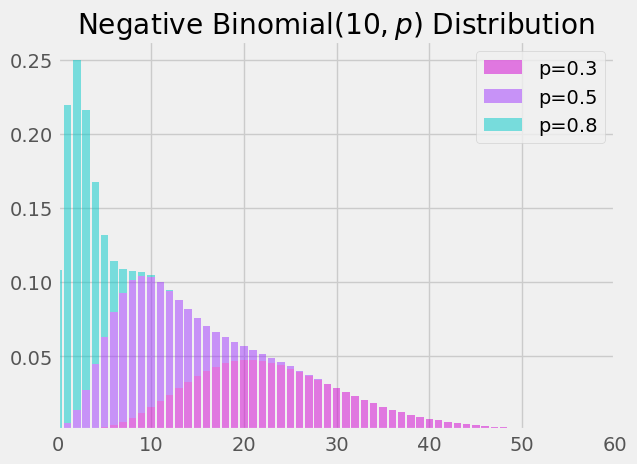

In [521]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# 定義負二項分佈的參數
k = 10   # 失敗次數
p_values = [0.3, 0.5, 0.8]  # 成功機率

max_p = max(p_values)

# 生成隨機變數
x = np.arange(0, 150)

# 初始化底線
bottom = np.zeros_like(x, dtype=np.float)

colors = ['#D200D2', '#9F35FF', '#00CACA']

# 繪製概率質量函數 (PMF)
for p, colors in zip(p_values, colors):
    pmf_values = nbinom.pmf(x, k, p)
    plt.bar(x, pmf_values, alpha=0.5, color=colors, label=f'p={p}', bottom=bottom)
    bottom += pmf_values

plt.title(f'Negative Binomial$({k}, p)$ Distribution ')
plt.xlim(0, 60)
plt.legend()
plt.savefig('poly_53.eps', format='eps')
plt.show()


C:\Users\ChienYu\AppData\Local\Temp\ipykernel_24840\4127499294.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bottom = np.zeros_like(x, dtype=np.float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


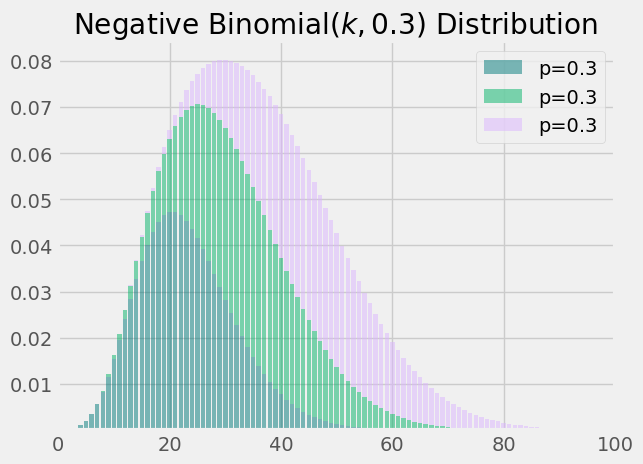

In [519]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# 定義負二項分佈的參數
k_values = [10, 15, 20]   # 失敗次數
p = 0.3 # 成功機率

max_p = max(p_values)

# 生成隨機變數
x = np.arange(0, 150)

# 初始化底線
bottom = np.zeros_like(x, dtype=np.float)

colors = ['#007979', '#01B468', '#DCB5FF']

# 繪製概率質量函數 (PMF)
for k, colors in zip(k_values, colors):
    pmf_values = nbinom.pmf(x, k, p)
    plt.bar(x, pmf_values, alpha=0.5, color=colors, label=f'p={p}', bottom=bottom)
    bottom += pmf_values

plt.title(f'Negative Binomial$(k, 0.3)$ Distribution ')
plt.xlim(0, 100)
plt.legend()
plt.savefig('poly_54.eps', format='eps')
plt.show()


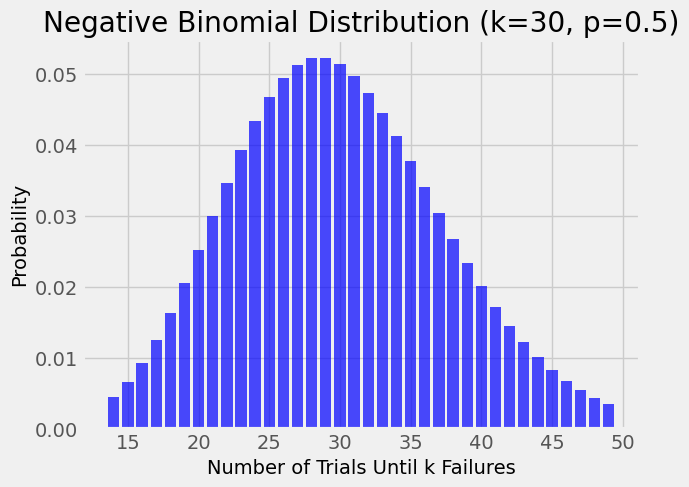

In [432]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# 定義負二項分佈的參數
k = 30   # 失敗次數
p = 0.5  # 成功機率

# 生成隨機變數
x = np.arange(nbinom.ppf(0.01, k, p), nbinom.ppf(0.99, k, p))
pmf_values = nbinom.pmf(x, k, p)

# 繪製概率質量函數 (PMF)
plt.bar(x, pmf_values, color='blue', alpha=0.7)

plt.title(f'Negative Binomial Distribution (k={k}, p={p})')
plt.xlabel('Number of Trials Until k Failures')
plt.ylabel('Probability')
plt.show()


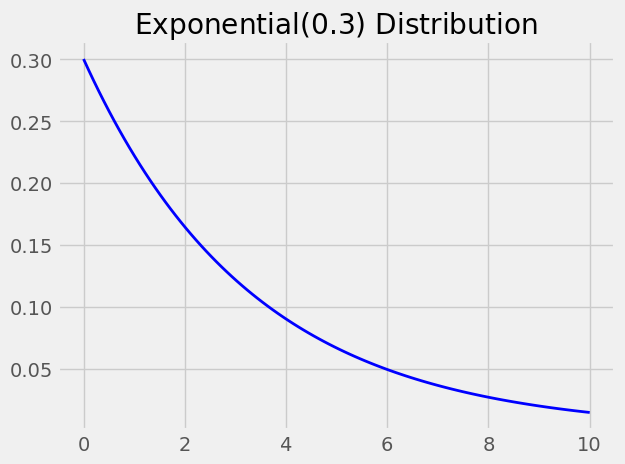

In [391]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# 定義指數分佈的參數 lambda (速率參數)
lambda_ = 0.3  # 可以根據需要調整

# 生成一個範圍在 [0, 10] 的 x 值
x = np.linspace(0, 10, 100)

# 計算對應的 PDF 值
pdf_values = expon.pdf(x, scale=1/lambda_)

# 繪製 PDF 圖形
plt.plot(x, pdf_values, color='blue', lw=2)

plt.title(f'Exponential$({lambda_})$ Distribution ')
#plt.xlabel('x')
#plt.ylabel('Probability Density')
plt.savefig('poly_46.eps', format='eps')
plt.show()


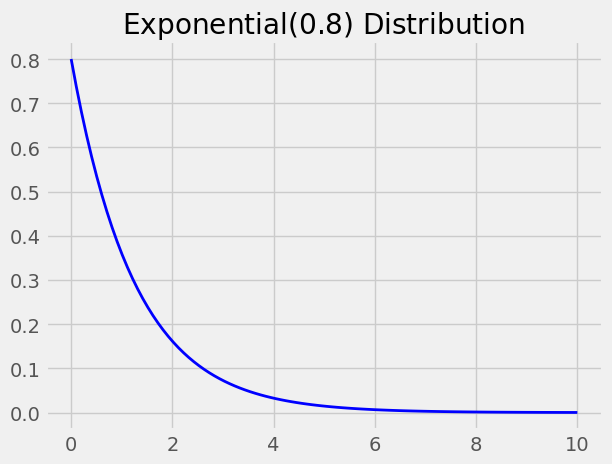

In [390]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# 定義指數分佈的參數 lambda (速率參數)
lambda_ = 0.8  # 可以根據需要調整

# 生成一個範圍在 [0, 10] 的 x 值
x = np.linspace(0, 10, 100)

# 計算對應的 PDF 值
pdf_values = expon.pdf(x, scale=1/lambda_)

# 繪製 PDF 圖形
plt.plot(x, pdf_values, color='blue', lw=2)

plt.title(f'Exponential$({lambda_})$ Distribution ')
#plt.xlabel('x')
#plt.ylabel('Probability Density')
plt.savefig('poly_47.eps', format='eps')
plt.show()


c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\ChienYu\anaconda3\envs\AI_class\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


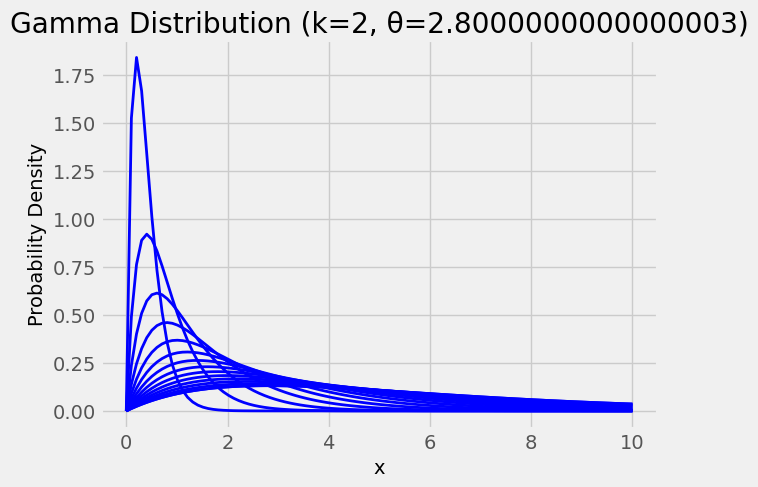

In [399]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# 定義伽瑪分佈的參數 k 和 θ
k = 2   
theta_values = np.arange(0, 3, 0.2)  
x = np.linspace(0, 10, 100)

pdf_values = gamma.pdf(x, k, scale=theta)
# 繪製 PDF 圖形
plt.plot(x, pdf_values, color='blue', lw=2)

for theta in theta_values:
    pdf_values =  gamma.pdf(x, k, scale=theta)
    plt.plot(x, pdf_values, color='b', lw=2)

plt.title(f'Gamma Distribution (k={k}, θ={theta})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()


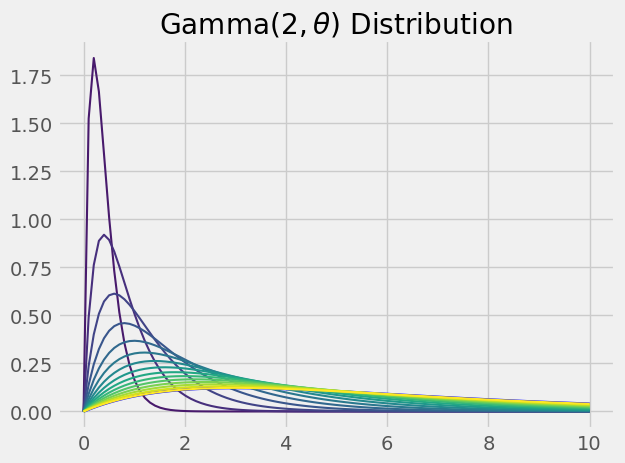

In [527]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# 定義伽瑪分佈的參數 k 和 θ
k = 2   
theta_values = np.arange(0, 3.1, 0.2)  
x = np.linspace(0, 10, 100)

# 使用 RdBu 色彩映射來為每條線分配漸層顏色
colors = plt.cm.viridis(np.linspace(0, 1, len(theta_values)))

pdf_values = gamma.pdf(x, k, scale=theta)
# 繪製 PDF 圖形
plt.plot(x, pdf_values, color='blue', lw=2)

for theta, color in zip(theta_values, colors):
    pdf_values =  gamma.pdf(x, k, scale=theta)
    plt.plot(x, pdf_values, color=color, lw=1.5)

plt.title(r'Gamma$(2, \theta)$ Distribution ')
#plt.xlabel('x')
#plt.ylabel('Probability Density')
plt.savefig('poly_48.eps', format='eps')
plt.show()


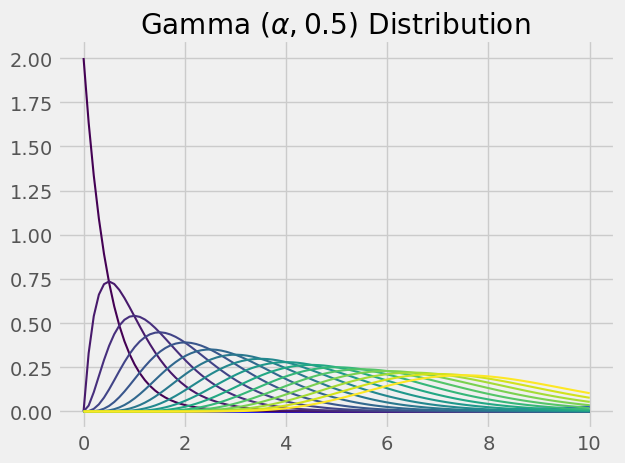

In [524]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# 定義伽瑪分佈的參數 k 和 θ
k_values = np.arange(1, 21, 1)    
theta = 0.5  
x = np.linspace(0, 10, 100)

# 使用 RdBu 色彩映射來為每條線分配漸層顏色
colors = plt.cm.viridis(np.linspace(0, 1, len(theta_values)))

pdf_values = gamma.pdf(x, k, theta)
# 繪製 PDF 圖形
plt.plot(x, pdf_values, color='blue', lw=2)

for k, color in zip(k_values, colors):
    pdf_values =  gamma.pdf(x, k, scale=theta)
    plt.plot(x, pdf_values, color=color, lw=1.5)

plt.title(r'Gamma $(\alpha, 0.5)$ Distribution ')
#plt.xlabel('x')
#plt.ylabel('Probability Density')
plt.savefig('poly_49.eps', format='eps')
plt.show()


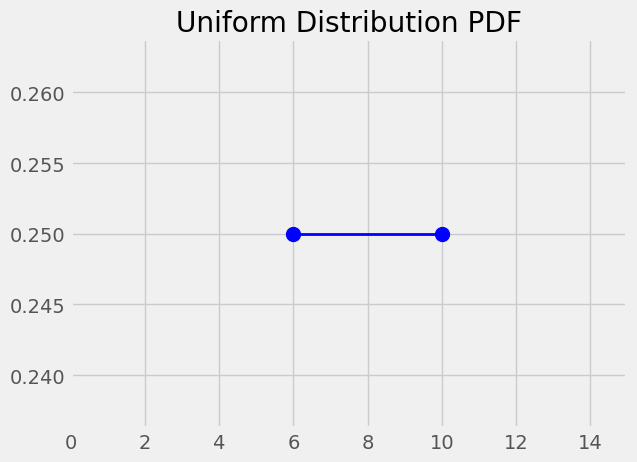

In [567]:
import numpy as np
import matplotlib.pyplot as plt

# 定義均勻分佈的區間 [a, b]
a = 6
b = 10

# 生成 x 值的範圍
x = np.linspace(a, b, 100)

# 計算均勻分佈的 PDF
pdf_values = np.full_like(x, 1/(b-a))

# 在特定點添加標記
plt.plot(x[0], 1/(b-a), marker='o', color='b', markersize=10)
plt.plot(x[99], 1/(b-a), marker='o', color='b', markersize=10)

#plt.plot(x[0], 0, marker='o',markerfacecolor='none',markeredgecolor='b', markersize=10)
#plt.plot(x[99], 0, marker='o',markerfacecolor='none',markeredgecolor='b', markersize=10)

#plt.axhline(xmin=0, xmax=6, y=0, color='b', linestyle='-')
#plt.axhline(xmin=6, xmax=15, y=0, color='b', linestyle='-')
#plt.axvline(x=6, ymin=0, ymax=0.25, color='b', linestyle='--')

# 繪製 PDF 圖形
plt.plot(x, pdf_values, color='blue', lw=2)
plt.title('Uniform Distribution PDF')
#plt.xlabel('x')
#plt.ylabel('Probability Density')
plt.xlim(0, 15)
plt.savefig('poly_55.eps', format='eps')
plt.show()
